In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

# Loading the Data

In [67]:
transaction_data = pd.read_csv("Original Data/transaction_data.csv")
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [3]:
np.sort(pd.unique(transaction_data['DAY']))

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [4]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


In [5]:
hh_data = pd.read_csv("Original Data/hh_demographic.csv")
hh_data.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [6]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


In [7]:
product_data = pd.read_csv("Original Data/product.csv")
product_data.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [8]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


# Task 1

In [114]:
#tmp = {i:0 for i in range (0, int(max(transaction_data['DAY'].unique()))+1)}
tmp_dict = [{i:0 for i in range (0, int(max(transaction_data['DAY'].unique()))+1)} for i in range(int(max(transaction_data['household_key'].unique()))+1)]

In [116]:
tmp_dict[0][0] = 1
tmp_dict[1][0]

0

In [117]:
index = 0
for index, row in transaction_data.iterrows():
    household_key = row['household_key']
    day = row['DAY']
    value = row['SALES_VALUE']
    tmp_dict[int(household_key)][int(day)] += value
    #print(tmp_dict[int(household_key)][int(day)])
    #tmp_data = total_transaction_data[int(household_key)]
    #tmp_data[tmp_data['DAY'] == day]['VALUE'] += value
    #print(tmp_data[tmp_data['DAY'] == day])
    #total_transaction_data[int(household_key)] = tmp_data
    index += 1
    if index % 100000 == 0:
        print (f'index : {index}')
  

index : 100000
index : 200000
index : 300000
index : 400000
index : 500000
index : 600000
index : 700000
index : 800000
index : 900000
index : 1000000
index : 1100000
index : 1200000
index : 1300000
index : 1400000
index : 1500000
index : 1600000
index : 1700000
index : 1800000
index : 1900000
index : 2000000
index : 2100000
index : 2200000
index : 2300000
index : 2400000
index : 2500000


In [121]:
tmp_dict[2374]

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 88.08999999999999,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 66.63,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 40.96,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 37.55999999999999,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 30.960000000000004,
 72: 0,
 73: 0,
 74: 0.0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 20.07,
 81: 0,
 82: 88.41,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 89.33999999999999,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 35.67,
 112: 0,
 113: 

In [122]:
index = 0
for house in transaction_data['household_key'].unique():
    dic = tmp_dict[int(house)]
    tmp_df = pd.DataFrame({'day':dic.keys(), 'value':dic.values()})
    tmp_df.to_csv(f'Data/data_{int(house)}.csv')
    if index % 100 == 0:
        print(f'index : {index}')
    index += 1

index : 0
index : 100
index : 200
index : 300
index : 400
index : 500
index : 600
index : 700
index : 800
index : 900
index : 1000
index : 1100
index : 1200
index : 1300
index : 1400
index : 1500
index : 1600
index : 1700
index : 1800
index : 1900
index : 2000
index : 2100
index : 2200
index : 2300
index : 2400


In [64]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [100]:
def Regression (household_key, deg, test):
    df = pd.read_csv(f'Data/data_{household_key}.csv')
    df = df[df['value'] != 0]
    scaler = StandardScaler()
    scaler.fit_transform(df)
    poly = PolynomialFeatures(deg)
    reg = LinearRegression()
    model = make_pipeline(poly,reg)
    x = np.array(df['day'])
    y = np.array(df['value'])
    model.fit(x.reshape(-1, 1), y)
    if test == True:
        y_pred = model.predict(x.reshape(-1, 1))
        plt.scatter(x, y, c='r')
        plt.plot(x, y_pred, linewidth=4)
    return (household_key, reg.coef_[deg])

(2104, 0.0002646998370967214)

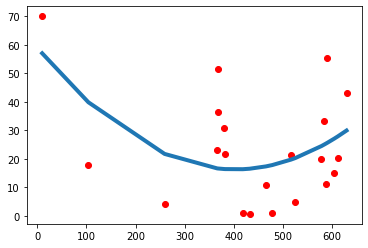

In [103]:
Regression(2104, 2, True)

In [79]:
coef_list = {}
index = 0
for house in transaction_data['household_key'].unique():
    y = Regression(house, 1, False)
    y2 = Regression(house, 2, False)
    coef_list[y[0]] = (y[1], y2[1])
    if index % 100 == 0:
        print(f'index = {index}')
    index += 1

index = 0
index = 100
index = 200
index = 300
index = 400
index = 500
index = 600
index = 700
index = 800
index = 900
index = 1000
index = 1100
index = 1200
index = 1300
index = 1400
index = 1500
index = 1600
index = 1700
index = 1800
index = 1900
index = 2000
index = 2100
index = 2200
index = 2300
index = 2400


In [80]:
coef_list

{2375: (-0.026508015784704818, 0.0001846139274673546),
 1364: (-2.9720323844859793e-05, 1.2996044066347697e-05),
 1130: (-0.004519949749800185, 9.318656231524576e-05),
 1173: (0.015808390861867035, -0.00022524419351721445),
 98: (0.01234521449153667, -5.971216619774662e-05),
 1172: (0.014768993651155849, 3.795440311079934e-05),
 1060: (-0.040859736863479816, -0.00024351524432702937),
 1351: (0.00489795516517484, 1.9033389606249253e-05),
 744: (0.033385795481263546, 3.2193158075226753e-06),
 212: (-0.006565783126925768, 0.00022867585475921053),
 2052: (-0.017402198222092352, -0.0010878488724979072),
 1287: (-0.008062305160064785, 1.5690493323702954e-05),
 718: (-0.002760640339386185, -5.784489758055798e-05),
 2483: (0.08197629116865417, 0.00017528010052348907),
 1617: (0.11674016546608275, -9.911211767573229e-05),
 240: (0.008191387023710806, 1.5043450535643028e-05),
 1843: (0.004986399816203936, 1.7508151600569018e-05),
 2305: (0.027760859119007057, 0.00011547378149181744),
 1916: (-0.

In [181]:
outdf = pd.DataFrame({'household_key' : coef_list.keys(), 'coef' : coef_list.values()})
outdf.head()

,household_key,coef
0,2375,[-0.026508003027279098]
1,1364,[-2.972031894792103e-05]
2,1130,[-0.004519949320450578]
3,1173,[0.015808380088855722]
4,98,[0.012345212554281261]


In [182]:
outdf.to_csv('householders_coefs.csv')

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [74]:
def Regression (household_key, deg, test):
    df = pd.read_csv(f'Data/data_{household_key}.csv')
    df = df[df['value'] != 0]
    df = df[np.abs(df['value']-df['value'].mean()) <= (3*df['value'].std())]
    scaler = StandardScaler()
    scaler.fit_transform(df)
    poly = PolynomialFeatures(deg)
    reg = LinearRegression()
    model = make_pipeline(poly,reg)
    x = np.array(df['day'])
    y = np.array(df['value'])
    model.fit(x.reshape(-1, 1), y)
    if test == True:
        y_pred = model.predict(x.reshape(-1, 1))
        plt.scatter(x, y, c='c')
        plt.plot(x, y_pred, linewidth=4)
    return (household_key, reg.coef_[deg])

(476, 0.0004264181780546406)

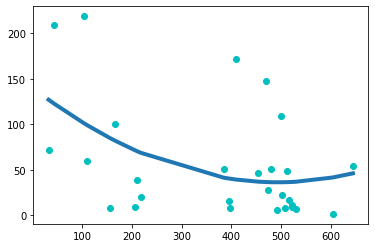

In [75]:
Regression(476, 2,True)

In [ ]:
values = 

In [59]:
outdf = pd.DataFrame({'household_key' : coef_list.keys(), 'coef' : coef_list.values()})
outdf.head()
outdf.to_csv('householders_coefs_poly.csv')